In [2]:
import pandas as pd

In [3]:
# What is the shape of "movies.csv"?
movie = pd.read_csv(r"C:\Users\Faizan\Downloads\movie_data\movies.csv")
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie.shape

(9742, 3)

In [5]:
#What is the shape of "ratings.csv"?
rating = pd.read_csv(r"C:\Users\Faizan\Downloads\movie_data\ratings.csv")

In [6]:
rating.shape

(100836, 4)

In [7]:
#How many unique "userId" are available in "ratings.csv"?
rating["userId"].nunique()

610

In [8]:
# Which movie has recieved maximum number of user ratings?
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [9]:

mergedmov_rat= pd.merge( movie,rating, on = 'movieId')
mergedmov_rat.groupby('title')['rating'].count().sort_values(ascending=False).reset_index().head(1)

,title,rating
0,Forrest Gump (1994),329


In [11]:
tag = pd.read_csv(r"C:\Users\Faizan\Downloads\movie_data\tags.csv")
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [12]:
#Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
mergedmov_tags = pd.merge(movie, tag, on = "movieId")
mergedmov_tags[mergedmov_tags["title"]=="Matrix, The (1999)"]

,movieId,title,genres,userId,tag,timestamp
1313,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,martial arts,1457842912
1314,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,sci-fi,1457842899
1315,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474,alternate universe,1137204991
1316,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,philosophy,1424141098
1317,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,post apocalyptic,1424141101


In [13]:
#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
mergedmov_rat[mergedmov_rat["title"]=="Terminator 2: Judgment Day (1991)"]["rating"].mean()


3.970982142857143

In [14]:
import seaborn as sns

C:\Users\Faizan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Density'>

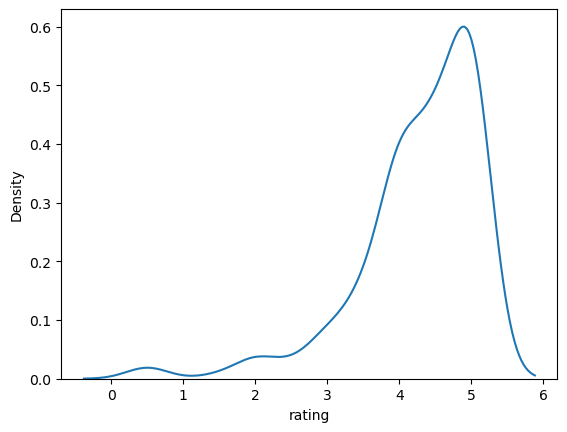

In [15]:
#How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?
Fight_rat = mergedmov_rat[mergedmov_rat["title"]=="Fight Club (1999)"]["rating"]
sns.kdeplot(Fight_rat)


From above plot the fight club rating is  Right Skewed Distribution

In [16]:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
mergedmov_rat= pd.merge( movie,rating, on = 'movieId')
mergedmov_rat["rating"].count()

100836

In [17]:
mergedmov_rat["rating"].mean()

3.501556983616962

In [18]:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.

grouped_ratings = rating.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings

movieId rating          
              count      mean
0          1    215  3.920930
1          2    110  3.431818
2          3     52  3.259615
3          4      7  2.357143
4          5     49  3.071429
...      ...    ...       ...
9719  193581      1  4.000000
9720  193583      1  3.500000
9721  193585      1  3.500000
9722  193587      1  3.500000
9723  193609      1  4.000000

[9724 rows x 3 columns]

In [19]:
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

In [20]:
#2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
merged_df = pd.merge(movie, grouped_ratings, on='movieId', how='inner')

In [21]:

#3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

filtered_movies = merged_df[merged_df['rating_count'] > 50]

In [22]:
filtered_movies

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [23]:
#Which movie is the most popular based on  average user ratings?
filtered_movies.sort_values(by="rating_mean",ascending=False).head()



,movieId,title,genres,rating_count,rating_mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041


In [24]:
#Select all the correct options which comes under top 5 popular movies based on number of user ratings.
filtered_movies.sort_values(by="rating_count",ascending=False).head()

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [25]:
#Which Sci-Fi movie is "third most popular" based on the number of user ratings?
filtered_movies[filtered_movies['genres'].apply(lambda x: 'Sci-Fi' in x.split('|'))].sort_values(by='rating_count',ascending=False)

,movieId,title,genres,rating_count,rating_mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [27]:
link = pd.read_csv(r"C:\Users\Faizan\Downloads\movie_data\links.csv")

In [28]:
link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


### Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [32]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

# Assuming 'filtered_movies' DataFrame contains movies with more than 50 user ratings
# Assuming 'links_df' DataFrame contains movieId, imdbId, tmdbId

movies_with_imdb_ids = pd.merge(filtered_movies, link, on='movieId', how='inner')

all_reviews = []

# Function to scrape IMDB reviews for a movie given its IMDB ID
def scrapper(imdb_id):
    id_str = str(int(imdb_id))
    n_zeroes = 7 - len(id_str)
    new_id = "0" * n_zeroes + id_str
    URL = f"https://www.imdb.com/title/tt{new_id}/reviews"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all review containers
    review_containers = soup.find_all('div', class_='text show-more__control')  # Update this class to the actual review container class
    
    reviews = [container.text.strip() for container in review_containers]
    return reviews

# Iterate through movies with IMDB IDs and scrape reviews
for index, row in movies_with_imdb_ids.iterrows():
    imdb_id = row['imdbId']
    movie_reviews = scrapper(imdb_id)
    all_reviews.extend(movie_reviews)

# Create a DataFrame from the collected reviews
reviews_df = pd.DataFrame({'IMDB_Reviews': all_reviews})